# Cu LMM XPS Analysis

In [1]:
# Libraries
import numpy as np
import pandas as pd
import os
from scipy.interpolate import interp1d
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# Function to interpolate
def interpolate(x, y):
    f = interp1d(x, y, kind='cubic', fill_value="extrapolate")
    xnew = np.arange(565, 580, 0.25)
    return xnew, f(xnew)

def normalize(y):
    return ((y) - min(y))/(max(y)-min(y))

In [25]:
df = pd.DataFrame()
drctry = './CuOx/Cu_LMM_2/'
files = os.listdir(drctry)
for file in files:
    if 'Cu' in file:
        print(file)
        data = pd.read_table(os.path.join(drctry, file), skiprows=3)
        columns = data.columns
        print(columns)
        #print(data.head())
        #data = data[::-1]
        #print(data.head())
        #data = data.drop_duplicates(subset='x', keep="last")
        x = np.asarray(data[columns[1]])
        y = np.asarray(data[columns[2]])
        xnew, fnew = interpolate(x, y)
        df['xnew'] = xnew
        df[file] = normalize(fnew)

df.head()

C0017_Cu_LMM.TXT
Index(['KE_Cu Auger/4', 'BE_Cu Auger/4', 'Background_Cu Auger/4'], dtype='object')
Cu2O_LMM.TXT
Index(['KE_Cu2O Cu LMM', 'BE_Cu2O Cu LMM', 'CPS_Cu2O Cu LMM',
       'Background_Cu2O Cu LMM'],
      dtype='object')
Cu_Metal_LMM.TXT
Index(['KE_Cu Metal Cu LMM', 'BE_Cu Metal Cu LMM', 'CPS_Cu Metal Cu LMM',
       'Background_Cu Metal Cu LMM'],
      dtype='object')
CuO_LMM.TXT
Index(['KE_CuO Cu LMM', 'BE_CuO Cu LMM', 'CPS_CuO Cu LMM',
       'Background_CuO Cu LMM'],
      dtype='object')
CuOH_LMM.TXT
Index(['KE_Cu(OH)2 Cu LMM', 'BE_Cu(OH)2 Cu LMM', 'CPS_Cu(OH)2 Cu LMM',
       'Background_Cu(OH)2 Cu LMM'],
      dtype='object')


,xnew,C0017_Cu_LMM.TXT,Cu2O_LMM.TXT,Cu_Metal_LMM.TXT,CuO_LMM.TXT,CuOH_LMM.TXT
0,565.00,0.000000,0.000000,0.058914,0.000000,0.000000
1,565.25,0.012478,0.012143,0.119737,0.032621,0.017951
2,565.50,0.025436,0.036292,0.119425,0.068120,0.056576
3,565.75,0.046330,0.047597,0.076451,0.113970,0.065098
4,566.00,0.056810,0.069665,0.035383,0.152131,0.060192


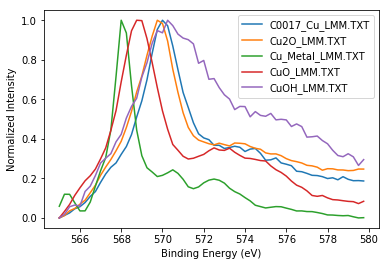

In [27]:
df.plot(x="xnew", y=['C0017_Cu_LMM.TXT', 'Cu2O_LMM.TXT',
                    'Cu_Metal_LMM.TXT', 'CuO_LMM.TXT',
                    'CuOH_LMM.TXT'])
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Normalized Intensity')
plt.savefig('')

In [28]:
X = np.array([np.asarray(df['Cu2O_LMM.TXT']), 
              np.asarray(df['CuO_LMM.TXT']), 
              np.asarray(df['CuOH_LMM.TXT'])])
Y = np.ndarray.flatten(np.asarray(df['C0017_Cu_LMM.TXT']))

In [29]:
(np.linalg.lstsq(np.transpose(X), Y))

(array([ 0.96849064, -0.16993219,  0.10589326]),
 array([ 0.09905658]),
 3,
 array([ 6.14860934,  1.36922577,  0.5707653 ]))

In [31]:
linY = 0.96 * np.asarray(df['Cu2O_LMM.TXT']) - 0.17 * np.asarray(df['CuO_LMM.TXT']) + 0.11 * np.asarray(df['CuOH_LMM.TXT'])
df['linY'] = linY

In [32]:
df.plot(x="xnew", y=['Cu(OH)2 LMM', 'Cu2O LMM',
                    'CuO LMM', 'CuOx LMM','linY'])
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Normalized Intensity')
plt.savefig('')

KeyError: "['Cu(OH)2 LMM' 'Cu2O LMM' 'CuO LMM' 'CuOx LMM'] not in index"

In [9]:
area_total = np.trapz(linY)
area_cuoh = np.trapz(0.41 * np.asarray(df['Cu(OH)2 LMM']))
area_cu2o = np.trapz(0.29 * np.asarray(df['Cu2O LMM']))
area_cuo = np.trapz(0.49 * np.asarray(df['CuO LMM']))

In [10]:
area_cuoh/area_total*100

45.210969040210308

In [11]:
area_cu2o/area_total*100

23.625677293446632

In [12]:
area_cuo/area_total*100

31.163353666343056

In [13]:
45+24+31

100

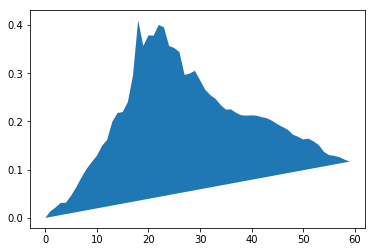

In [14]:
plt.fill(0.41 * np.asarray(df['Cu(OH)2 LMM']))
#plt.fill(0.29 * np.asarray(df['Cu2O LMM']))
#plt.fill(0.49 * np.asarray(df['CuO LMM']))
#plt.fill(linY)

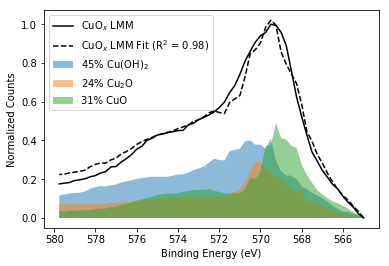

In [15]:
import numpy as np
import matplotlib.pyplot as plt

y_0 = np.asarray(df['CuOx LMM'])
y = 0.41 * np.asarray(df['Cu(OH)2 LMM'])
yy = 0.29 * np.asarray(df['Cu2O LMM'])
yyy = 0.49 * np.asarray(df['CuO LMM'])
x = np.asarray(df['xnew'])

fig, (ax1) = plt.subplots(1,1); 
ax1.fill_between(x, 0, y, alpha=0.5)
ax1.fill_between(x, 0, yy, alpha=0.5)
ax1.fill_between(x, 0, yyy, alpha=0.5)
ax1.invert_xaxis()
plt.plot(x, y_0, color='black')
plt.plot(x, linY, color='black', linestyle='dashed')
plt.ylabel('Normalized Counts')
plt.xlabel('Binding Energy (eV)')
ax1.legend(['CuO$_x$ LMM', 'CuO$_x$ LMM Fit (R$^2$ = 0.98)', 
            '45% Cu(OH)$_2$', '24% Cu$_2$O', '31% CuO'])
plt.savefig('Cu_LMM_Fits', dpi=300)
plt.show()


In [16]:
from sklearn.metrics import r2_score
r2_score(y_0, linY)

0.97610279950698853

In [33]:
df.head()

,xnew,C0017_Cu_LMM.TXT,Cu2O_LMM.TXT,Cu_Metal_LMM.TXT,CuO_LMM.TXT,CuOH_LMM.TXT,linY
0,565.00,0.000000,0.000000,0.058914,0.000000,0.000000,0.000000
1,565.25,0.012478,0.012143,0.119737,0.032621,0.017951,0.008086
2,565.50,0.025436,0.036292,0.119425,0.068120,0.056576,0.029484
3,565.75,0.046330,0.047597,0.076451,0.113970,0.065098,0.033479
4,566.00,0.056810,0.069665,0.035383,0.152131,0.060192,0.047637


In [34]:
r2_score(df['C0017_Cu_LMM.TXT'], df['Cu2O_LMM.TXT'])

0.94089027945949155

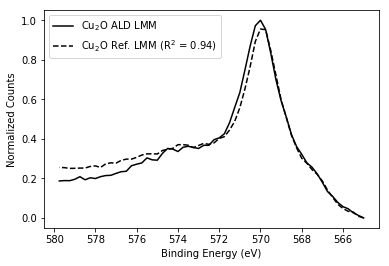

In [36]:
import numpy as np
import matplotlib.pyplot as plt

y_0 = np.asarray(df['C0017_Cu_LMM.TXT'])
lin_Y = np.asarray(df['Cu2O_LMM.TXT'])
x = np.asarray(df['xnew'])

fig, (ax1) = plt.subplots(1,1); 
ax1.invert_xaxis()
plt.plot(x, y_0, color='black')
plt.plot(x, linY, color='black', linestyle='dashed')
plt.ylabel('Normalized Counts')
plt.xlabel('Binding Energy (eV)')
ax1.legend(['Cu$_2$O ALD LMM', 'Cu$_2$O Ref. LMM (R$^2$ = 0.94)'])
plt.savefig('Cu_LMM_Fits_C0017', dpi=300)
plt.show()